#**SONAR Rock vs Mine Prediction**

This project helps you classify whether an object is rock or mine.

In [ ]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Dataset
data = pd.read_csv("/content/Copy of sonar data.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [ ]:
# Changing column name
data.rename(columns={60:"rock or Mine"}, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,rock or Mine
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [ ]:
data.shape # Checking Shape of the dataset

(208, 61)

In [ ]:
data.describe() # Describing the entire dataset

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
data.isnull().sum() # Checking for null values in the dataset

0               0
1               0
2               0
3               0
4               0
               ..
56              0
57              0
58              0
59              0
rock or Mine    0
Length: 61, dtype: int64

In [ ]:
data.info() # Checking info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   0             208 non-null    float64
 1   1             208 non-null    float64
 2   2             208 non-null    float64
 3   3             208 non-null    float64
 4   4             208 non-null    float64
 5   5             208 non-null    float64
 6   6             208 non-null    float64
 7   7             208 non-null    float64
 8   8             208 non-null    float64
 9   9             208 non-null    float64
 10  10            208 non-null    float64
 11  11            208 non-null    float64
 12  12            208 non-null    float64
 13  13            208 non-null    float64
 14  14            208 non-null    float64
 15  15            208 non-null    float64
 16  16            208 non-null    float64
 17  17            208 non-null    float64
 18  18            208 non-null    

In [ ]:
# Hypothesis Testing
# Performing ANOVA test to select the necessary fetures from the dataset

group_column = 'rock or Mine'

groups = [data[data[group_column] == group] for group in data[group_column].unique()]

results = {}
for column in data.columns:
    if column != group_column:
        group_data = [group[column] for group in groups]
        f_statistic, p_value = stats.f_oneway(*group_data)
        results[column] = {'F-statistic': f_statistic, 'p-value': p_value}

for column, result in results.items():
    print(f"Column: {column}, F-statistic: {result['F-statistic']}, p-value: {result['p-value']}")

Column: 0, F-statistic: 16.41841285416424, p-value: 7.194899710765681e-05
Column: 1, F-statistic: 11.637284435107453, p-value: 0.0007779401745762996
Column: 2, F-statistic: 7.901260212099059, p-value: 0.005416774591851573
Column: 3, F-statistic: 13.808276126907584, p-value: 0.0002607819189515257
Column: 4, F-statistic: 10.702272653945773, p-value: 0.001254468908252069
Column: 5, F-statistic: 3.6714100498592876, p-value: 0.056737677364421736
Column: 6, F-statistic: 2.748633543380109, p-value: 0.09885956615501074
Column: 7, F-statistic: 7.657460920461407, p-value: 0.006168532494762667
Column: 8, F-statistic: 23.738683340668306, p-value: 2.1980127140373945e-06
Column: 9, F-statistic: 27.13129854642574, p-value: 4.5960176781283126e-07
Column: 10, F-statistic: 47.49583834635673, p-value: 6.589225516154417e-11
Column: 11, F-statistic: 37.45752593691387, p-value: 4.643453816447829e-09
Column: 12, F-statistic: 22.343550410778683, p-value: 4.220738672356738e-06
Column: 13, F-statistic: 5.224896

In [ ]:
x = []
for column, result in results.items():
  if result['p-value'] > 0.05:
    x.append(column)

In [ ]:
data.drop(x, axis=1, inplace=True) # Dropping the unwanted column

In [ ]:
data

,0,1,2,3,4,7,8,9,10,11,...,46,47,48,49,50,51,52,53,57,rock or Mine
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.1601,0.3109,0.2111,0.1609,0.1582,...,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0084,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.3481,0.3337,0.2872,0.4918,0.6552,...,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0049,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.3771,0.5598,0.6194,0.6333,0.7060,...,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0164,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.1276,0.0598,0.1264,0.0881,0.1992,...,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0044,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.2467,0.3564,0.4459,0.4152,0.3952,...,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0048,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1694,0.2328,0.2684,0.3108,0.2933,...,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0115,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.1018,0.1030,0.2154,0.3085,0.3425,...,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0032,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1178,0.1258,0.2529,0.2716,0.2374,...,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0138,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1123,0.1945,0.2354,0.2898,0.2812,...,0.1258,0.0954,0.0489,0.0241,0.0042,0.0086,0.0046,0.0126,0.0079,M


In [ ]:
# Performing Label Encoding on the 'rock vs Mine' column

le = LabelEncoder()

data['rock or Mine'] = le.fit_transform(data['rock or Mine'])
data.head()

,0,1,2,3,4,7,8,9,10,11,...,46,47,48,49,50,51,52,53,57,rock or Mine
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.1601,0.3109,0.2111,0.1609,0.1582,...,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0084,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.3481,0.3337,0.2872,0.4918,0.6552,...,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0049,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.3771,0.5598,0.6194,0.6333,0.7060,...,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0164,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.1276,0.0598,0.1264,0.0881,0.1992,...,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0044,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.2467,0.3564,0.4459,0.4152,0.3952,...,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0048,1


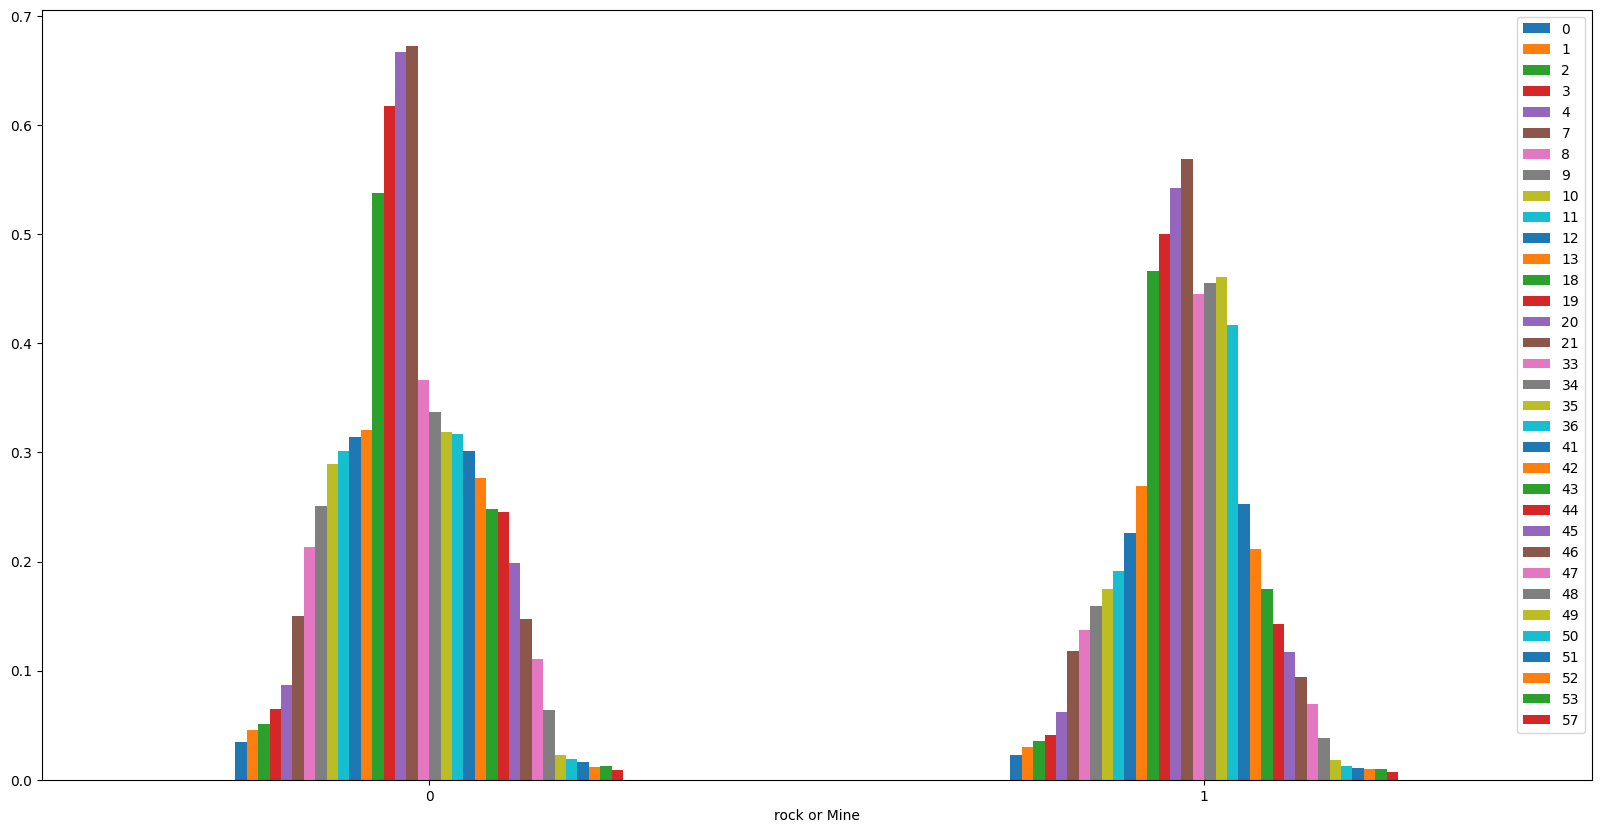

In [ ]:
# Vishulizing the data

data.groupby(data['rock or Mine']).mean().plot(kind='bar', figsize=(20, 10))
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# Splitting the data
X = data.drop("rock or Mine", axis=1)
y = data["rock or Mine"]

In [ ]:
# Creating training and testing data using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
# Checking shapes of training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((166, 34), (42, 34), (166,), (42,))

In [ ]:
# Creating a dictionary of models and there parameters for  Cross Validation and  Hyperparameter Tuning

params = {'LogisticRegression':{'model':LogisticRegression(),
                               'params':{'C':[1, 5, 10], 'solver':['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                                         'multi_class':['auto', 'ovr']}
                               },
         'SVC':{'model':SVC(gamma='auto'), 'params':{'C':[5, 10, 20],
                                                     'kernel':['rbf', 'linear']}
                },
         'RandomForestClassifier':{'model':RandomForestClassifier(),
                                   'params':{'n_estimators':[1, 5, 10]}
                                   },
         'DecisionTreeClassifier':{'model':DecisionTreeClassifier(),
                                   'params':{'max_features':['int', 'float', 'auto', 'sqrt', 'log2', 'None'],
                                             'max_leaf_nodes':[50, 60, 70]}
                                   }
         }

In [ ]:
# Performing Cross Validation and  Hyperparameter Tuning to find the best model
score = []

for model_names, model_param in params.items():
  clf = GridSearchCV(model_param['model'], model_param['params'], cv=5, return_train_score=False)
  clf.fit(X, y)
  score.append({
      'model':model_names,
      'best_score':clf.best_score_,
      'best_param':clf.best_params_
  })

df = pd.DataFrame(score, columns = ['model', 'best_score', 'best_param'])
df

,model,best_score,best_param
0,LogisticRegression,0.678049,"{'C': 10, 'multi_class': 'auto', 'solver': 'lb..."
1,SVC,0.668641,"{'C': 20, 'kernel': 'rbf'}"
2,RandomForestClassifier,0.658885,{'n_estimators': 5}
3,DecisionTreeClassifier,0.716028,"{'max_features': 'auto', 'max_leaf_nodes': 50}"


In [ ]:
# Selecting the best model and fitting the train and test data

model = DecisionTreeClassifier(max_features='log2', max_leaf_nodes=50)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_features='log2', max_leaf_nodes=50)

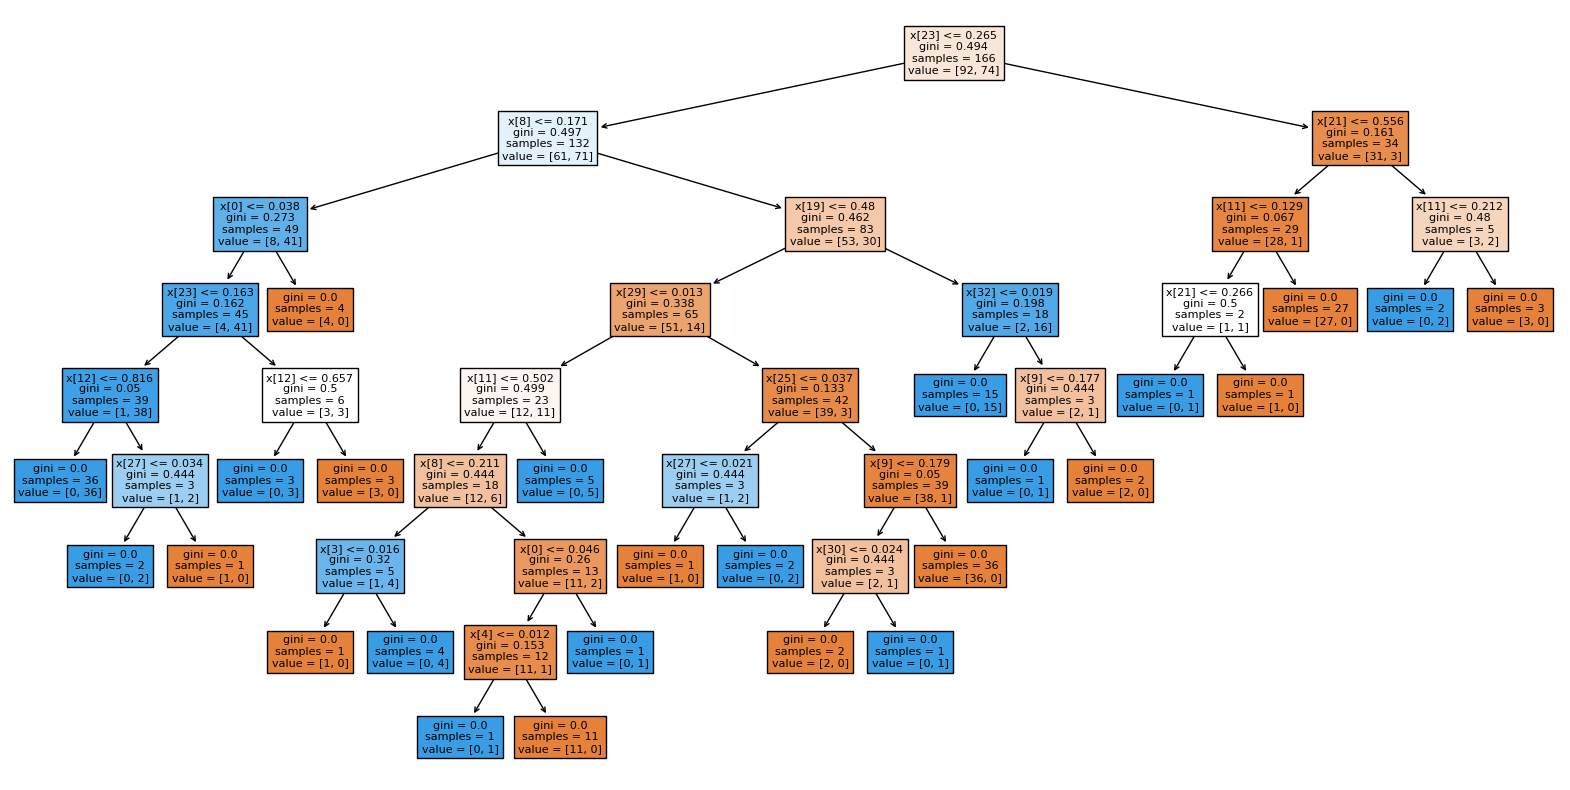

In [ ]:
# Vishulizing the model
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True)
plt.show()

In [ ]:
model.score(X_test, y_test)*100 # Checking the test score

76.19047619047619

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)*100 # Checking the test score using accuracy_score function

76.19047619047619

In [ ]:
model.score(X_train, y_train)*100 # Checking the train score

100.0

In [ ]:
Y_pred = model.predict(X_train)
accuracy_score(Y_pred, y_train)*100 # Checking the testing score using accuracy_score function

100.0

In [ ]:
# Performing pruning because my model is overfitting
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
ccp_alphas

array([0.        , 0.00502008, 0.00903614, 0.01004016, 0.01104418,
       0.01147447, 0.01514165, 0.01606426, 0.01647768, 0.01842665,
       0.01874163, 0.02086476, 0.02301269, 0.02484793, 0.03171175,
       0.04599259, 0.07789472])

In [ ]:
models = []

for ccp_alpha in ccp_alphas:
  model = DecisionTreeClassifier(max_features='log2', max_leaf_nodes=50, ccp_alpha=ccp_alpha)
  model.fit(X_train, y_train)
  models.append(model)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(models[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07789472068769127


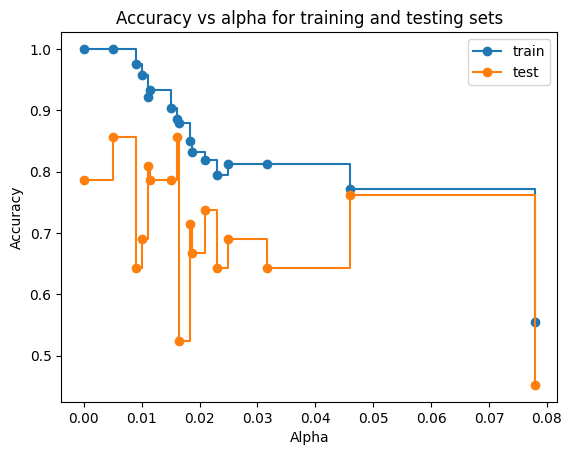

In [ ]:
train_score = [model.score(X_train, y_train) for model in models]
test_score = [model.score(X_test, y_test) for model in models]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker='o', label='train', drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, marker='o', label='test', drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Performing Parameter tuning and fitting the data on the model according to the pruning result

model1 = DecisionTreeClassifier(max_features='log2', max_leaf_nodes=50, ccp_alpha=0.048)
model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.048, max_features='log2', max_leaf_nodes=50)

In [ ]:
model1.score(X_train, y_train) # Checking the train score after pruning

0.8313253012048193

In [ ]:
model1.score(X_test, y_test) # Checking the test score after pruning

0.8333333333333334

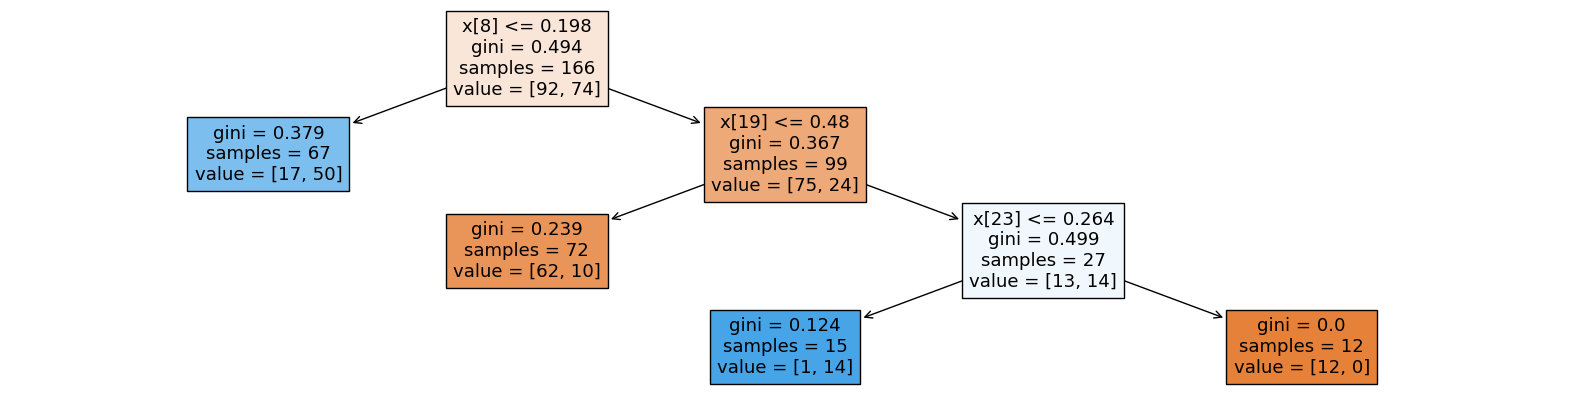

In [ ]:
# Vishulizing the model after pruning
plt.figure(figsize=(20, 5))
tree.plot_tree(model1, filled=True)
plt.show()

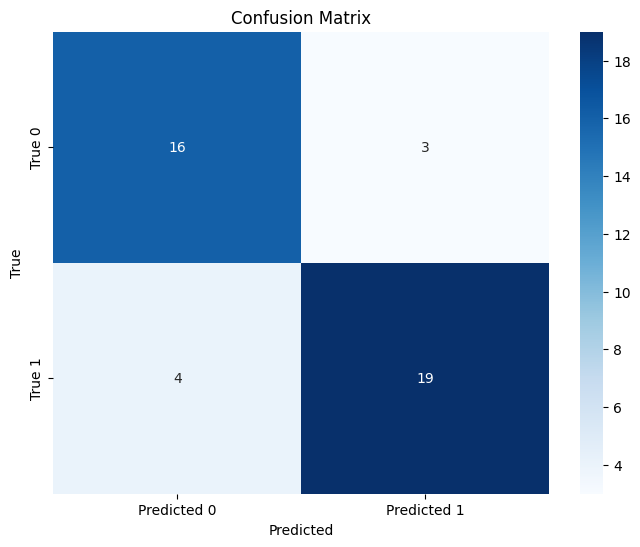

In [ ]:
# Creating Confusion Matrix
y_pred = model1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Checking Precision,	Recall, F1-Score using classification_report function
report = classification_report(y_test, y_pred)

report_lines = report.split('\n')

# Remove empty lines
report_lines = [line for line in report_lines if line.strip()]

# Skip the header line and create a list of dictionaries for each class
data = []
for line in report_lines[2:-3]:  # Skip header and footer lines
    class_name, precision, recall, f1_score, support = line.split()
    data.append({
        'Class': class_name,
        'Precision': float(precision),
        'Recall': float(recall),
        'F1-Score': float(f1_score),
        'Support': int(support)
    })

df = pd.DataFrame(data)
df

,Class,Precision,Recall,F1-Score,Support
0,1,0.86,0.83,0.84,23


In [ ]:
# Checking ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.8340961098398169


In [ ]:
pickle.dump(model1, open('sonar_rock_vs_mine_prediction.pkl', 'wb')) # Storing the model

In [ ]:
model_loaded = pickle.load(open('sonar_rock_vs_mine_prediction.pkl', 'rb')) # Loading the stored model

In [ ]:
# Making predictions with the loaded model

input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,
              0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,
              0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998)

input_data_to_numpy_array = np.array(input_data)

input_data_reshaped = input_data_to_numpy_array.reshape(1, -1)

prediction = model_loaded.predict(input_data_reshaped)

if prediction == 'R':
  print(prediction, "It's a Rock")
else:
  print(prediction, "It's a Mine")

[1] It's a Mine
